# Implementation 6 - Assessment of a classification model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

## Importing the data set

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,no
1,15810944,Male,35,20000,no
2,15668575,Female,26,43000,no
3,15603246,Female,27,57000,no
4,15804002,Male,19,76000,no
5,15728773,Male,27,58000,no
6,15598044,Female,27,84000,no
7,15694829,Female,32,150000,yes
8,15600575,Male,25,33000,no
9,15727311,Female,35,65000,no


In [4]:
X = dataset[['Age', 'EstimatedSalary']].values
print(X[:10])

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]]


In [5]:
print(dataset['Purchased'][:10].values)

['no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no']


## Inspecting the data set

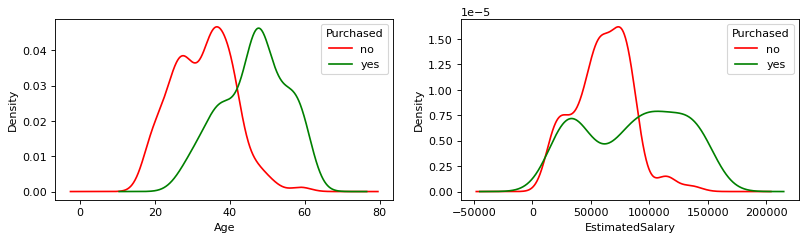

In [6]:
feature_list = ['Age', 'EstimatedSalary']

fig, axs = plt.subplots(1,len(feature_list), figsize=(12,3), dpi= 80)
for i_axs in range(len(feature_list)):
    for i_purchase, purchase in enumerate(['no', 'yes']):
        (dataset[feature_list[i_axs]][dataset['Purchased']==purchase]).plot(kind='density', label=purchase, c=['red', 'green'][i_purchase], ax=axs[i_axs])
    axs[i_axs].set_xlabel(feature_list[i_axs])
    axs[i_axs].legend(title='Purchased')
plt.show()   

Alternative:

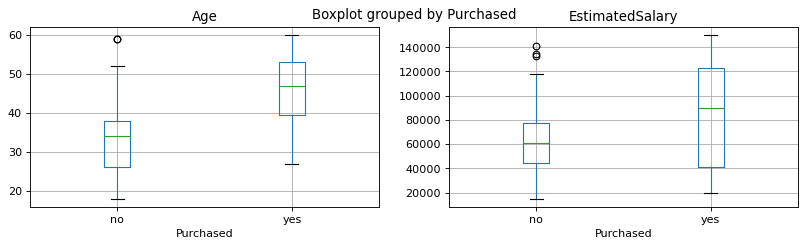

In [7]:
feature_list = ['Age', 'EstimatedSalary']

fig, axs = plt.subplots(1,len(feature_list), figsize=(12,3), dpi= 80)
for i_axs in range(len(feature_list)):
    dataset.boxplot(column=feature_list[i_axs], by='Purchased', ax=axs[i_axs])
plt.show()  

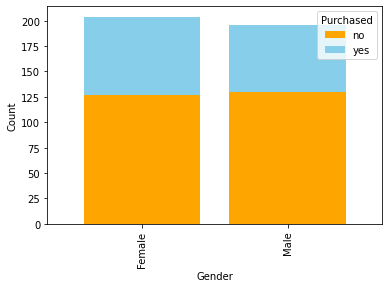

In [8]:
df_plot = dataset.groupby(['Gender', 'Purchased']).size().reset_index().pivot(index='Gender', columns='Purchased', values=0)
df_plot.plot(kind='bar', stacked=True, color=['orange', 'skyblue'], width=0.8)
plt.ylabel('Count')
plt.show() 

## Preparing the data set

**Encoding:**

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset['Purchased'])
print(y[:10])

[0 0 0 0 0 0 0 1 0 0]


In [14]:
label_encoder.classes_

array(['no', 'yes'], dtype=object)

**Train-test split:**

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (300, 2) (300,)
Test set: (100, 2) (100,)


In [11]:
print(X_train[:10])

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]]


**Feature scaling:**

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train[:10]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153]])

## Training the logistic regression model

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
# classifier = LogisticRegression(C=0.01, solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression()

We can check what prediction is made on some examples:

In [15]:
print(label_encoder.inverse_transform(classifier.predict(sc.transform([[30,200000]]))))

['yes']


In [16]:
print(label_encoder.inverse_transform(classifier.predict(sc.transform([[30,100000]]))))

['no']


## Making predictions

**Probability of purchasing:**

In [17]:
y_proba = classifier.predict_proba(X_test)
y_proba[:10]
# co 2 line la 0 va 1 (binary)

array([[0.88725351, 0.11274649],
       [0.83324206, 0.16675794],
       [0.80549253, 0.19450747],
       [0.91056209, 0.08943791],
       [0.90253903, 0.09746097],
       [0.99212979, 0.00787021],
       [0.9848589 , 0.0151411 ],
       [0.26779092, 0.73220908],
       [0.99419108, 0.00580892],
       [0.49579544, 0.50420456]])

**Prediction of the class and comparison with the true one:**

In [18]:
y_pred = classifier.predict(X_test)
#y_pred dc auyet dinh boi y_proba ()
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),axis=1)[:10])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]]


## Performance assessment

**Confusion matrix:**

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


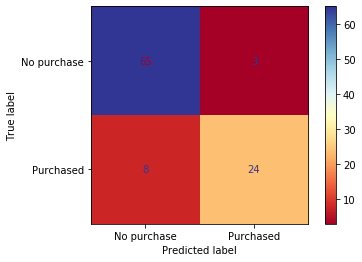

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay(cm, display_labels=["No purchase", "Purchased"]).plot(cmap='RdYlBu')

**Accuracy, precision, recall:**

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, y_pred),2)))
print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y_test, y_pred),2)))
print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y_test, y_pred),2)))
print('F1 score (combined measure of precision and recall) is ' + str(round(f1_score(y_test, y_pred), 2)))

Accuracy (proportion of correct predictions) is 0.89
Precision (proportion of true purchases among purchase predictions) is 0.89
Recall (proportion of true purchases that are correctly predicted) is 0.75
F1 score (combined measure of precision and recall) is 0.81


In [22]:
# Alternative
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.75      0.81        32
           0       0.89      0.96      0.92        68

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



**ROC curve and AUC:**

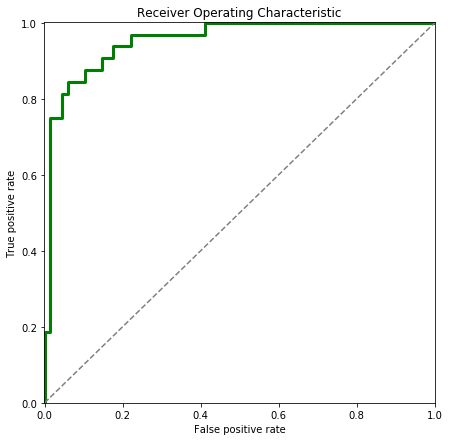

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score = y_proba[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

plt.subplots(1, figsize=(7,7))
plt.plot(false_positive_rate, true_positive_rate, c='green', linewidth=3)

plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--", c='grey')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

plt.show()

In [24]:
print('AUC: ', roc_auc_score(y_test, y_score))

AUC:  0.9540441176470588


## Plotting class domains

**On training set**

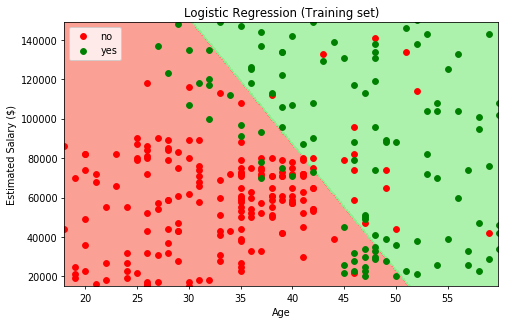

In [25]:
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(8,5), dpi= 70)
X_set, y_set = sc.inverse_transform(X_train), label_encoder.inverse_transform(y_train)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.1),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 1000))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary ($)')
plt.legend()
plt.show()

**On test set**

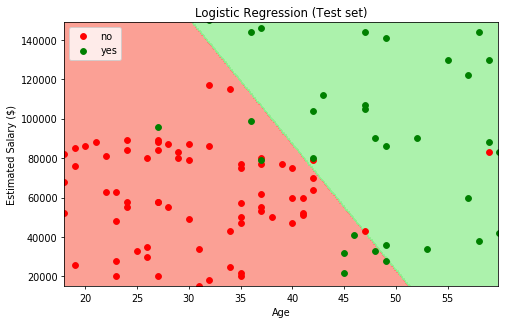

In [26]:
fig = plt.figure(figsize=(8,5), dpi= 70)
X_set, y_set = sc.inverse_transform(X_test), label_encoder.inverse_transform(y_test)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.1),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 1000))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary ($)')
plt.legend()
plt.show()

## Comparison with model with one single predictor

In [27]:
X = dataset['EstimatedSalary'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

[[66  2]
 [17 15]]


In [28]:
print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, y_pred),2)))
print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y_test, y_pred),2)))
print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y_test, y_pred),2)))
print('F1 score (combined measure of precision and recall) is ' + str(round(f1_score(y_test, y_pred), 2)))

Accuracy (proportion of correct predictions) is 0.81
Precision (proportion of true purchases among purchase predictions) is 0.88
Recall (proportion of true purchases that are correctly predicted) is 0.47
F1 score (combined measure of precision and recall) is 0.61


Reminder of the performance with the two predictors:

In [29]:
print(cm)

[[65  3]
 [ 8 24]]


`Accuracy (proportion of correct predictions) is 0.89
Precision (proportion of true purchases among purchase predictions) is 0.89
Recall (proportion of true purchases that are correctly predicted) is 0.75
F1 score (combined measure of precision and recall) is 0.81`

With the estimated salary as unique predictor, we have one more false positive and nine more false negatives. The precision is thus almost the same whereas the recall decreased significantly.

# K-fold cross validation 

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline


X = dataset['EstimatedSalary'].values.reshape(-1, 1)

estimator = make_pipeline(StandardScaler(), LogisticRegression())

scores = cross_val_score(estimator, X, y, cv=5, scoring='f1', verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [31]:
scores

array([0.66666667, 0.75      , 0.48780488, 0.68085106, 0.17142857])

In [32]:
print(f"F1 score (k-fold cross validation): {scores.mean():.2f}")

F1 score (k-fold cross validation): 0.55
